## Supplementary Figure

KS-test results comparing mitocheck and JUMP feature spaces

_Analysis originally performed in https://github.com/WayScience/JUMP-single-cell/tree/main/3.analyze_data_

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggplot2))

# Load figure themes and colors
source("figure_themes.r")

Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
# Define function for loading data 
load_process_data <- function(results_file_to_load, normalized_or_raw) {
    ks_test_df <- readr::read_tsv(
        results_file_to_load,
        col_types = readr::cols(
            .default = "d",
            "feature" = "c"
        )
    ) %>%
        tidyr::separate(
            feature,
            into = c(
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2",
                "parameter3"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::group_by(feature) %>%
        dplyr::mutate(avg_kstest_per_feature = mean(ks_stat)) %>%
        dplyr::arrange(desc(avg_kstest_per_feature)) %>%
        dplyr::mutate(data_type = normalized_or_raw) %>%
        dplyr::ungroup()

    ks_test_df$feature <- factor(ks_test_df$feature, levels = unique(ks_test_df$feature))

    return(ks_test_df)
}

In [3]:
# Set output files
output_file <- file.path(
    "figures", "supplementary", "jump_mitocheck_feature_space_analysis.png"
)

In [4]:
# Load data
results_dir <- file.path(
    "..", "..", "JUMP-single-cell", "3.analyze_data", "results"
)
results_file <- file.path(results_dir, "ks_test_differences_raw.tsv.gz")
ks_test_raw_df <- load_process_data(
    results_file_to_load=results_file,
    normalized_or_raw="raw"
)

results_file <- file.path(results_dir, "ks_test_differences_normalized.tsv.gz")
ks_test_norm_df <- load_process_data(
    results_file_to_load=results_file,
    normalized_or_raw="normalized"
)

ks_test_df <- dplyr::bind_rows(ks_test_raw_df, ks_test_norm_df)

ks_test_df$data_type <- factor(ks_test_df$data_type, levels = c("raw", "normalized"))

print(dim(ks_test_df))
head(ks_test_df)

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 97000 rows [1, 5, 9, 11,
22, 25, 27, 28, 29, 30, 32, 36, 39, 42, 44, 65, 81, 82, 83, 84, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 97000 rows [1, 2, 3, 4,
5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, ...].”


[1] 298000     17


feature,feature_group,measurement,channel,parameter1,parameter2,parameter3,ks_stat,ks_pval,mitocheck_mean,mitocheck_variance,jump_mean,jump_variance,neg_log_p,random_seed,avg_kstest_per_feature,data_type
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8669410,0,0.08547939,0.7576461,1.573079,7.529773,Inf,943966,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8768861,0,0.08547939,0.7576461,1.584080,5.768630,Inf,185605,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8635117,0,0.08547939,0.7576461,1.525826,5.342594,Inf,632711,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8707133,0,0.08547939,0.7576461,1.601214,6.181039,Inf,137570,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8707133,0,0.08547939,0.7576461,1.651846,9.038387,Inf,370789,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8762003,0,0.08547939,0.7576461,1.578806,6.388982,Inf,588816,0.872713,raw


## Visualize results

In [5]:
axis_text_size = 12
axis_title_size = 14
legend_text_size = 12
legend_title_size = 14
strip_text_size = 10

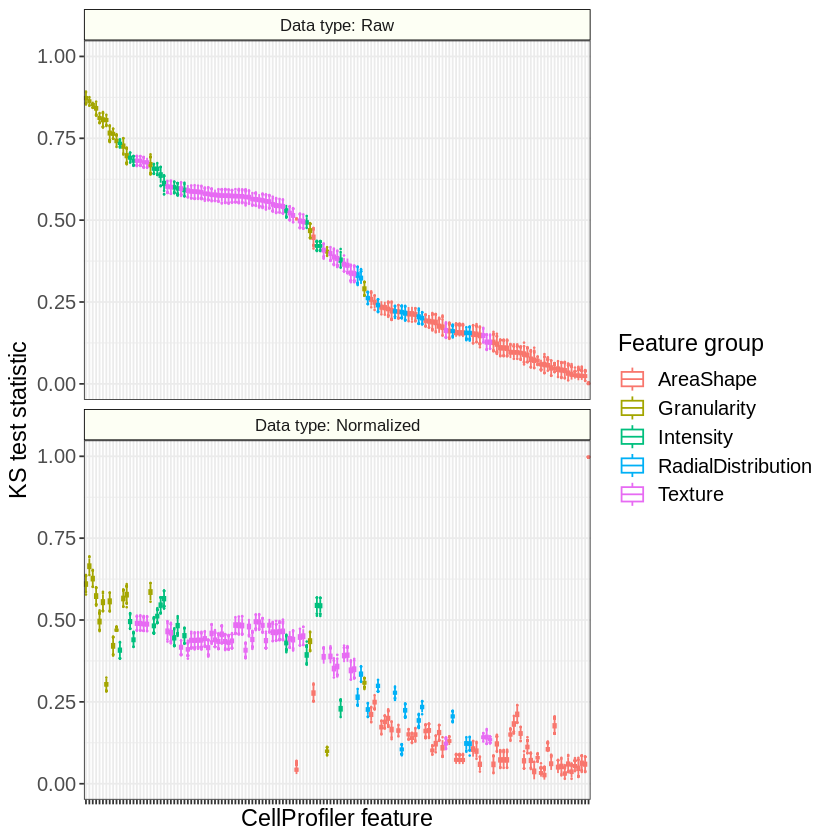

In [6]:
## Visualize all features
custom_labeller <- function(value) {
  paste("Data type:", stringr::str_to_title(value))
}

full_summary_boxplot <- (
    ggplot(ks_test_df, aes(x=feature, y=ks_stat))
    + geom_boxplot(aes(color = feature_group), outlier.size = 0.1)
    + theme_bw()
    + figure_theme
    + facet_wrap("~data_type", nrow = 2, labeller = labeller(data_type = custom_labeller))
    + theme(
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = axis_text_size),
        axis.title = element_text(size = axis_title_size),
        legend.text = element_text(size = legend_text_size),
        legend.title = element_text(size = legend_title_size),
        strip.text = element_text(size = strip_text_size)
    )
    + scale_color_discrete(name = "Feature group")
    + labs(
        x = "CellProfiler feature",
        y = "KS test statistic"
    )
)

full_summary_boxplot

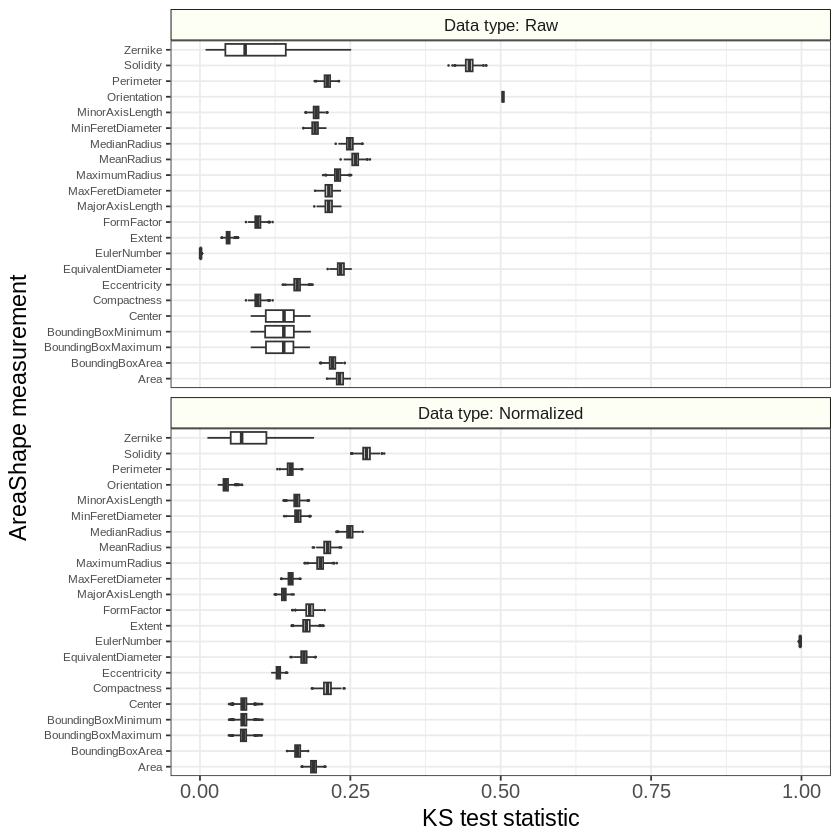

In [7]:
## Visualize the areashape features
areashape_boxplot <- (
    ggplot(
        ks_test_df %>% dplyr::filter(feature_group == "AreaShape"),
        aes(y=measurement, x=ks_stat)
    )
    + geom_boxplot(outlier.size = 0.1)
    + theme_bw()
    + figure_theme
    + theme(
        axis.text.x = element_text(size = axis_text_size),
        axis.title = element_text(size = axis_title_size),
        legend.text = element_text(size = legend_text_size),
        legend.title = element_text(size = legend_title_size),
        strip.text = element_text(size = strip_text_size)
    )
    + facet_wrap(
        "~data_type",
        nrow = 2,
        labeller = labeller(data_type = custom_labeller)
    )
    + labs(
        x = "KS test statistic",
        y = "AreaShape measurement"
    )
)

areashape_boxplot

In [8]:
head(ks_test_df)

feature,feature_group,measurement,channel,parameter1,parameter2,parameter3,ks_stat,ks_pval,mitocheck_mean,mitocheck_variance,jump_mean,jump_variance,neg_log_p,random_seed,avg_kstest_per_feature,data_type
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8669410,0,0.08547939,0.7576461,1.573079,7.529773,Inf,943966,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8768861,0,0.08547939,0.7576461,1.584080,5.768630,Inf,185605,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8635117,0,0.08547939,0.7576461,1.525826,5.342594,Inf,632711,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8707133,0,0.08547939,0.7576461,1.601214,6.181039,Inf,137570,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8707133,0,0.08547939,0.7576461,1.651846,9.038387,Inf,370789,0.872713,raw
Granularity_10_DNA,Granularity,10,DNA,NA,NA,NA,0.8762003,0,0.08547939,0.7576461,1.578806,6.388982,Inf,588816,0.872713,raw


In [9]:
ks_areashape_highlight_df <- ks_test_df %>%
    dplyr::mutate(
        areashape_or_not = ifelse(feature_group == "AreaShape", "AreaShape", "Other"),
        zernike_or_not = ifelse(measurement == "Zernike", "Zernike", "Other")
    ) 

ks_areashape_highlight_df$areashape_or_not <- factor(
    ks_areashape_highlight_df$areashape_or_not,
    levels = c("AreaShape", "Other")
)

ks_areashape_highlight_df$zernike_or_not <- factor(
    ks_areashape_highlight_df$zernike_or_not,
    levels = c("Zernike", "Other")
)

print(length(unique(
    ks_areashape_highlight_df %>%
        dplyr::filter(areashape_or_not == "AreaShape") %>%
        dplyr::pull(feature)
    )))

length(unique(
    ks_areashape_highlight_df %>%
        dplyr::filter(zernike_or_not == "Zernike") %>%
        dplyr::pull(feature)
    ))

[1] 54


[1] 30

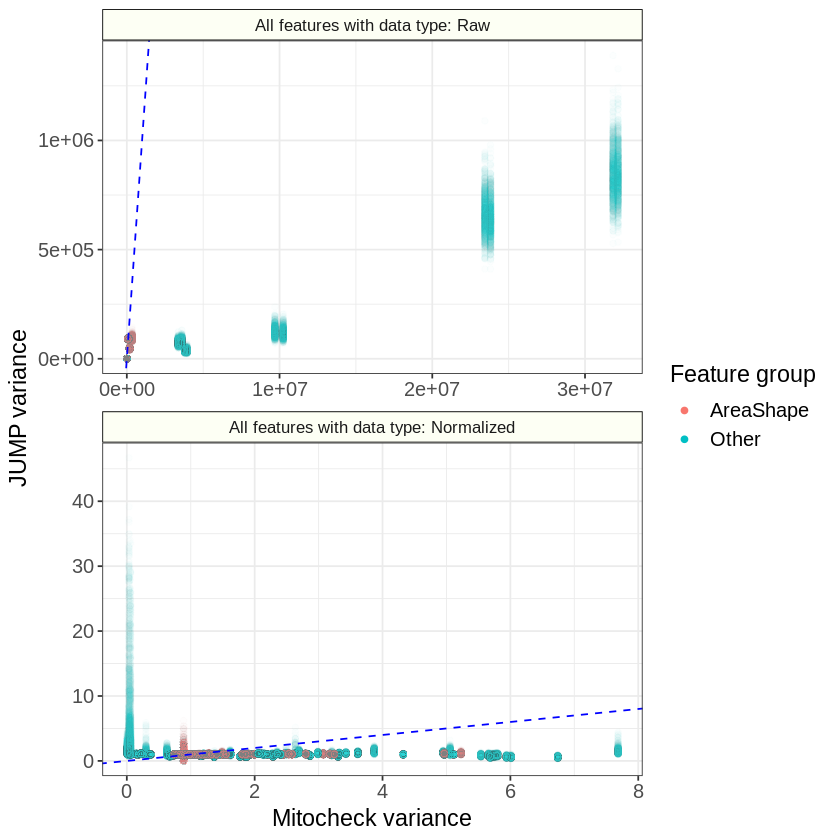

In [10]:
## Visualize variance of features compared to ks_stat
custom_labeller <- function(value) {
  paste("All features with data type:", stringr::str_to_title(value))
}

variance_gg <- (
    ggplot(
        ks_areashape_highlight_df,
        aes(x = mitocheck_variance, y = jump_variance)
    )
    + geom_point(aes(color = areashape_or_not), alpha = 0.01)
    + theme_bw()
    + figure_theme
    + theme(
        axis.text = element_text(size = axis_text_size),
        axis.title = element_text(size = axis_title_size),
        legend.text = element_text(size = legend_text_size),
        legend.title = element_text(size = legend_title_size),
        strip.text = element_text(size = strip_text_size)
    )
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "blue")
    + facet_wrap(
        "~data_type",
        nrow = 2,
        labeller = labeller(data_type = custom_labeller),
        scales = "free"
    )
    + guides(
      color = guide_legend(override.aes = list(alpha = 1)),
      size = guide_legend(override.aes = list(size = 2))
    )
    + scale_color_discrete(name = "Feature group")
    + labs(
        x = "Mitocheck variance",
        y = "JUMP variance"
    )
)

variance_gg

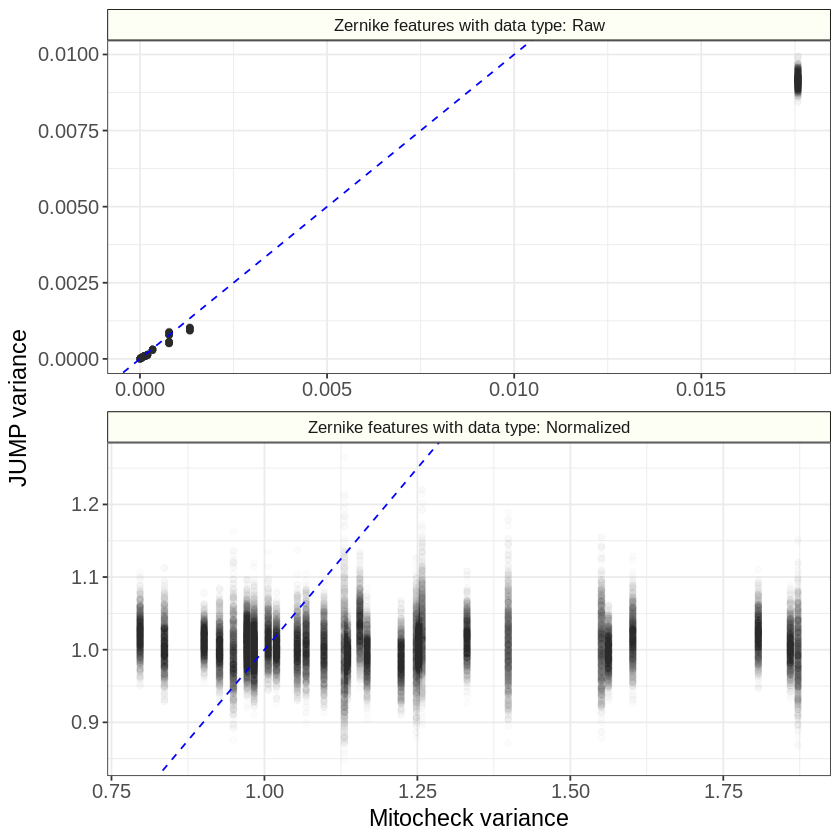

In [11]:
custom_labeller <- function(value) {
  paste("Zernike features with data type:", stringr::str_to_title(value))
}

variance_zernike_gg <- (
    ggplot(
        ks_areashape_highlight_df %>%
        dplyr::filter(
            zernike_or_not == "Zernike"
        ),
        aes(x = mitocheck_variance, y = jump_variance)
    )
    + geom_point(alpha = 0.01, color = "black")
    + theme_bw()
    + figure_theme
    + theme(
        axis.text = element_text(size = axis_text_size),
        axis.title = element_text(size = axis_title_size),
        strip.text = element_text(size = strip_text_size)
    )
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "blue")
    + facet_wrap(
        "~data_type",
        nrow = 2,
        labeller = labeller(data_type = custom_labeller),
        scales = "free"
    )
    + labs(
        x = "Mitocheck variance",
        y = "JUMP variance"
    )
    + scale_color_discrete(name = "AreaShape\nfeature")
    + guides(
      color = guide_legend(override.aes = list(alpha = 1)),
      size = guide_legend(override.aes = list(size = 2))
    )
)

variance_zernike_gg

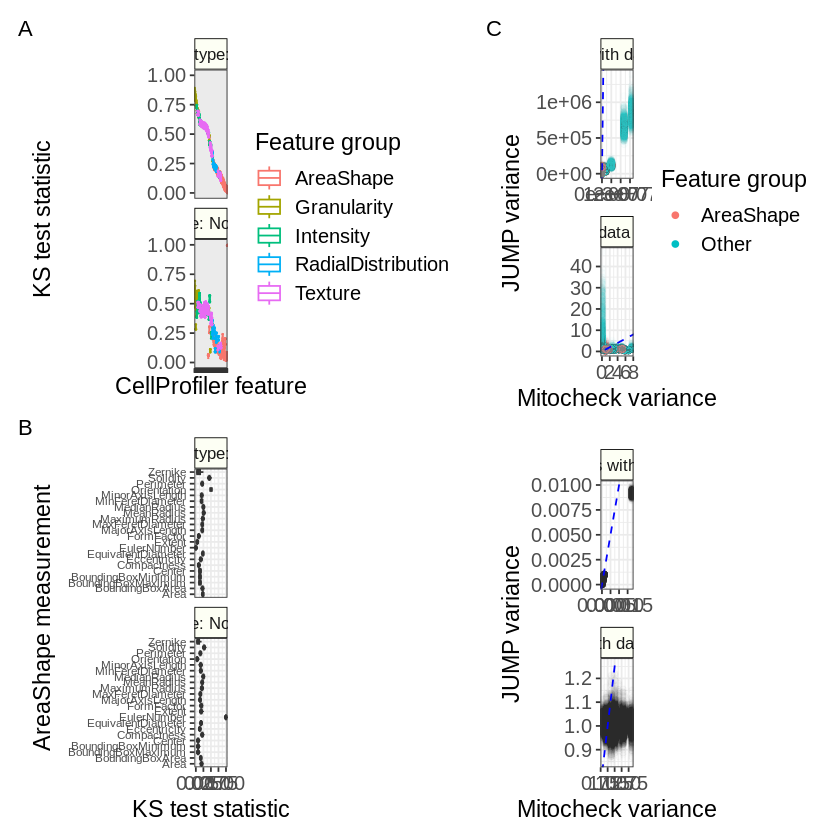

In [12]:
sup_fig_gg <- (
    (
        full_summary_boxplot / areashape_boxplot
    ) | (
        variance_gg / variance_zernike_gg
    )
) + plot_annotation(tag_levels = list(c("A", "B", "C", ""))) + plot_layout(heights = c(1, 0.6))

ggsave(output_file, dpi = 500, height = 11, width = 13)

sup_fig_gg